In [67]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator

sim = AerSimulator()

### Create Oracles (Black-Box functions)

In [135]:
def create_oracle(case, n):
    '''
    Creates Oracle.

    Parameters
    ----------
    case: Type of the oracle (constant or balance).
    n: Number of qubits.

    Return
    ------
    Quantum Circuit based on the oracle.
    '''
    oracle = QuantumCircuit(n+1)
    if case == 'constant':
        output = np.random.randint(2)
        if output == 1:
            oracle.x(n)
    if case == 'balance':
        b = np.random.randint(1, 2**n)
        b_str = format(b, '0'+str(n)+'b')
        for qbit in range(len(b_str)):
            if b_str[qbit] == '1':
                oracle.x(qbit)
        for qbit in range(n):
            oracle.cx(qbit, n)
        for qbit in range(len(b_str)):
            if b_str[qbit] == '1':
                oracle.x(qbit)
    gate = oracle.to_gate()
    gate.name ='Oracle'
    oracle.draw('mpl')
    return oracle


### JB Algorithm

In [136]:
def dj_algorithm(oracle, n):
    '''
    Deutsch-Jozsa Algorithm.

    Parameters
    ----------
    oracle: Black-box oracle.
    n: Number of qubits.

    Return
    ------
    A measured circuit containing the oracle applied.
    '''
    dj = QuantumCircuit(n+1, n)
    dj.x(n)
    dj.h(n)
    for qbit in range(n):
        dj.h(qbit)
    dj.append(oracle, range(n+1))
    for qbit in range(n):
        dj.h(qbit)
    for i in range(n):
        dj.measure(i, i)
    return dj

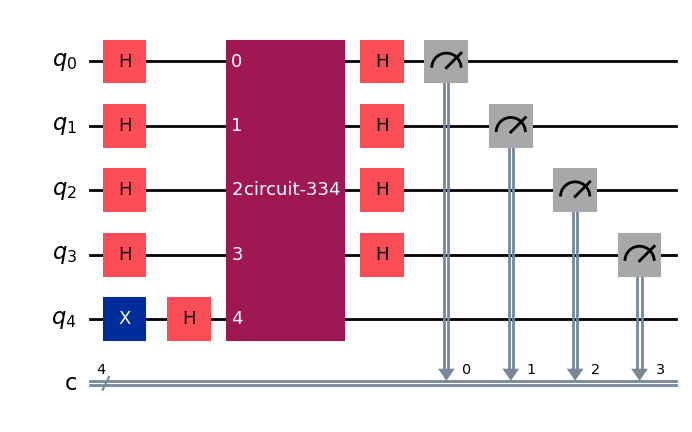

In [140]:
n = 4
oracle = create_oracle('balance', n)
dj = dj_algorithm(oracle, n)
dj.draw('mpl')

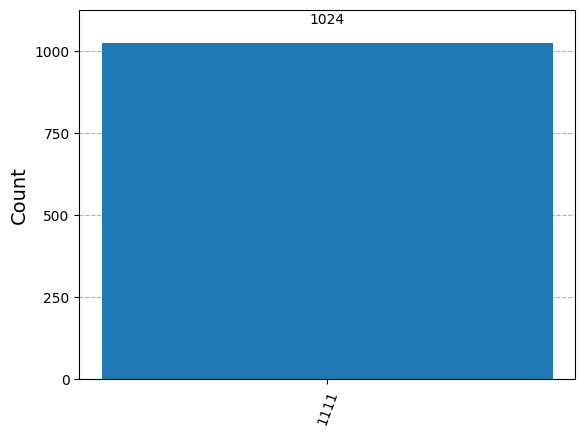

In [141]:
dj_transpiled = transpile(dj, sim)
results = sim.run(dj_transpiled).result()
counts = results.get_counts()
plot_histogram(counts)